### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Badminton']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 13396    Badminton
13397    Badminton
13398    Badminton
13399    Badminton
13400    Badminton
           ...    
13892    Badminton
13893    Badminton
13894    Badminton
13895    Badminton
13896    Badminton
Name: Sport, Length: 501, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 13396        NA
13397        NA
13398        NA
13399        NA
13400        NA
          ...  
13892        NA
13893      Gold
13894      Gold
13895    Bronze
13896    Bronze
Name: Medal, Length: 501, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 13396 to 13896
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      501 non-null    int64  
 1   Unnamed: 0_x    501 non-null    int64  
 2   ID              501 non-null    int64  
 3   Name            501 non-null    object 
 4   Sex             501 non-null    object 
 5   Age             501 non-null    float64
 6   Height          501 non-null    float64
 7   Weight          501 non-null    float64
 8   NOC             501 non-null    object 
 9   Games           501 non-null    object 
 10  Year            501 non-null    int64  
 11  Season          501 non-null    object 
 12  City            501 non-null    object 
 13  Sport           501 non-null    object 
 14  Event           501 non-null    object 
 15  Medal           501 non-null    object 
 16  Team            501 non-null    object 
 17  Unnamed: 0_y    501 non-null 

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (375, 1) (375, 6)
Test Set  : (126, 1) (126, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
13763,24.0,57.0,167.0,5.040000e+12,1.280630e+08,39355.629651,NA
13666,21.0,66.0,167.0,4.890000e+12,1.268430e+08,38551.595279,NA
13403,17.0,65.0,170.0,1.100000e+12,1.136618e+08,9677.832947,NA
13808,20.0,66.0,166.0,8.560000e+12,1.350695e+09,6337.478113,NA
13572,25.0,63.0,168.0,1.220000e+12,5.020000e+07,24302.788845,NA
...,...,...,...,...,...,...,...
13884,26.0,60.0,162.0,6.568510e+10,9.464495e+06,6940.159254,NA
13893,25.0,60.0,173.0,8.560000e+12,1.350695e+09,6337.478113,Gold
13519,23.0,72.0,177.0,2.790000e+11,8.781326e+07,3177.196810,NA
13609,24.0,60.0,165.0,1.960000e+12,1.296075e+09,1512.258164,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        441
Gold       20
Silver     20
Bronze     20
Name: Medal, dtype: int64


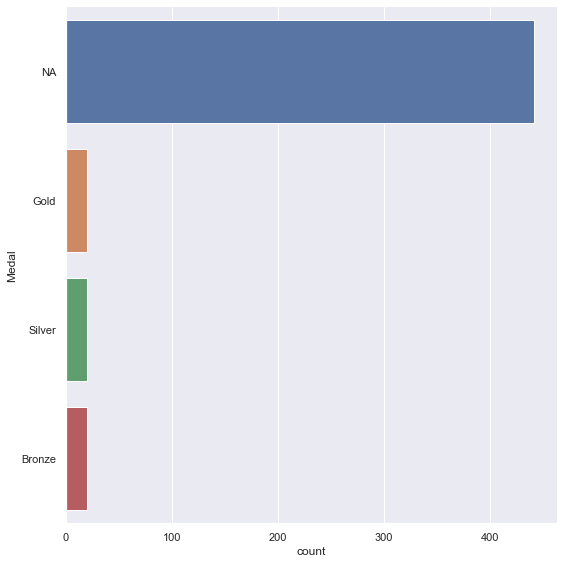

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(375, 6) (375, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1308, 6) (1308, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,24.000000,57.000000,167.000000,5.040000e+12,1.280630e+08,39355.629651,NA
1,21.000000,66.000000,167.000000,4.890000e+12,1.268430e+08,38551.595279,NA
2,17.000000,65.000000,170.000000,1.100000e+12,1.136618e+08,9677.832947,NA
3,20.000000,66.000000,166.000000,8.560000e+12,1.350695e+09,6337.478113,NA
4,25.000000,63.000000,168.000000,1.220000e+12,5.020000e+07,24302.788845,NA
...,...,...,...,...,...,...,...
1303,27.396517,59.810449,161.206966,1.844876e+12,5.565084e+07,32228.120440,Silver
1304,23.032840,59.934321,160.229878,6.277502e+12,1.677941e+08,47191.125061,Silver
1305,23.886697,60.000000,163.990136,5.845321e+12,3.929788e+08,38579.529669,Silver
1306,28.524691,65.207819,176.821673,6.556893e+11,4.910827e+08,33252.522323,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
13542,22.0,59.0,172.0,1.220000e+12,5.020000e+07,24302.788845
13846,26.0,60.0,162.0,2.310000e+11,2.711107e+07,8520.505038
13747,24.0,58.0,166.0,1.015098e+10,2.728777e+06,3719.973510
13831,23.0,66.0,172.0,8.560000e+12,1.350695e+09,6337.478113
13801,33.0,55.0,163.0,3.980000e+11,6.784398e+07,5866.401203
...,...,...,...,...,...,...
13464,38.0,58.0,155.0,3.960000e+11,5.250652e+07,7541.921215
13879,22.0,62.0,166.0,4.600000e+12,1.324655e+09,3472.602300
13737,27.0,62.0,170.0,1.550000e+12,3.324577e+07,46622.468366
13689,31.0,58.0,160.0,1.860000e+13,3.231275e+08,57562.414996


Number of Medal Types : 4
Bronze    327
Gold      327
NA        327
Silver    327
Name: Medal, dtype: int64


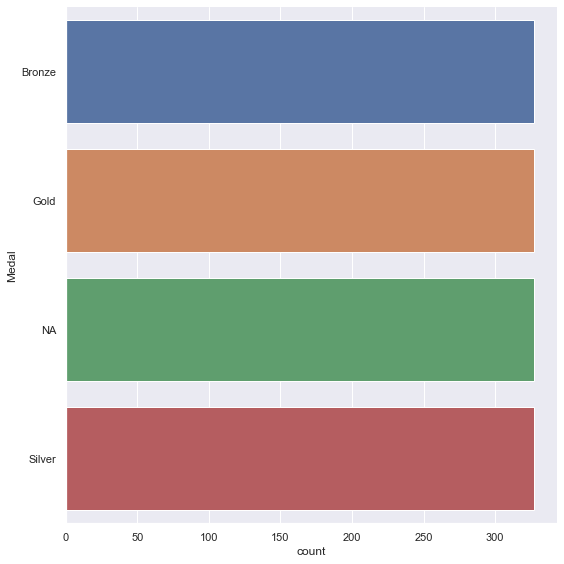

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (981, 1) (981, 6)
Test Set  : (327, 1) (327, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9949031600407747

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9235474006116208



<AxesSubplot:>

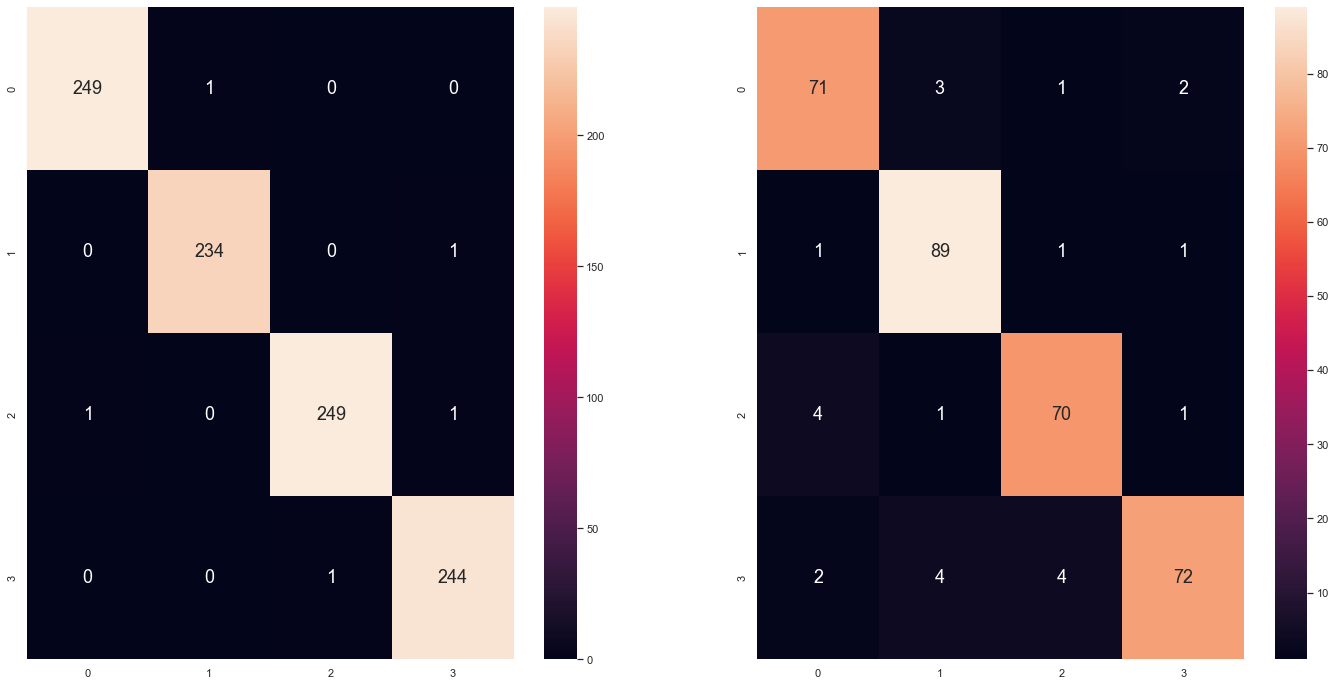

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 12)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

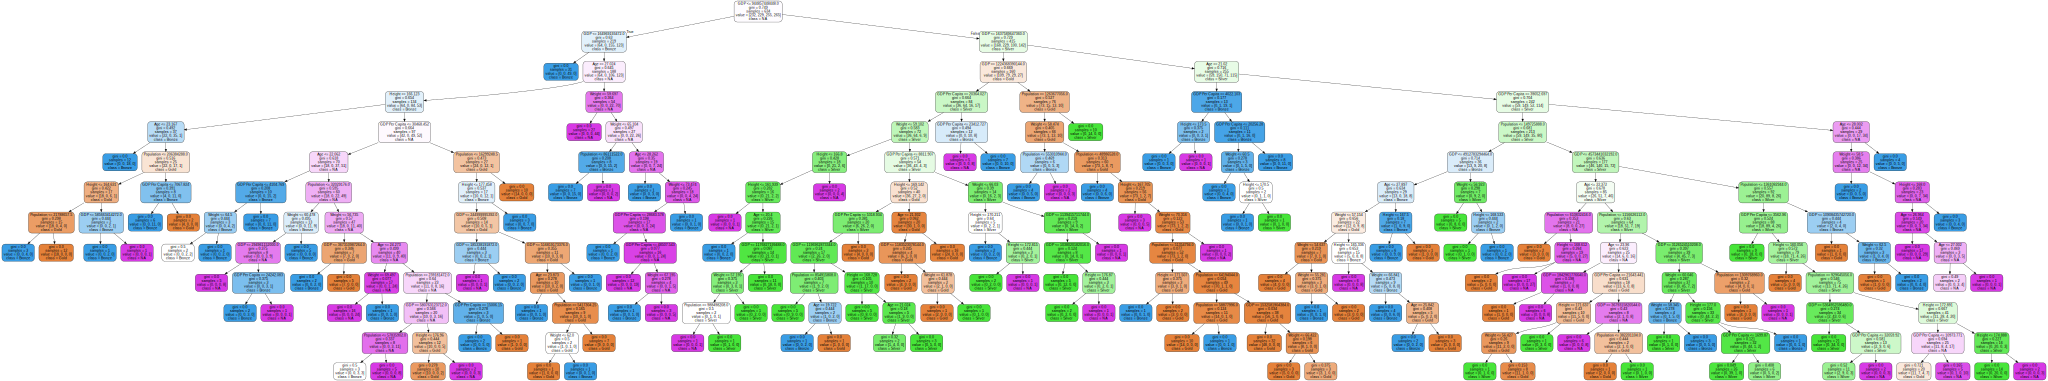

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8015873015873016


<AxesSubplot:>

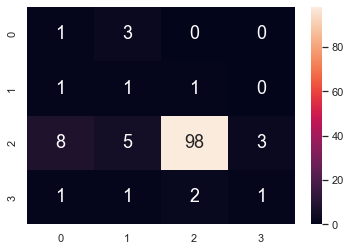

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})